# Output 문장 구조 EDA

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from transformers import AutoTokenizer
from collections import defaultdict

In [2]:
def make_dataframe(path: str) -> pd.DataFrame:
    """
    Read a json file and return a pandas DataFrame.

    Parameters:
    path (str): Path to the json file.

    Returns:
    pd.DataFrame: DataFrame of the json file.
    """
    # Read the json file
    with open(path, 'r') as file:
        data = json.load(file)

    # Create a DataFrame
    # columns = ['id', 'conversation', 'subject_keyword', 'output']
    df = pd.DataFrame(data)
    df['conversation'] = df['input'].apply(lambda x: x['conversation'])
    df['subject_keyword'] = df['input'].apply(lambda x: x['subject_keyword'])

    # Drop the 'input' column
    df.drop('input', axis=1, inplace=True)

    # Speakers in the conversation
    df['speakers'] = df['conversation'].apply(lambda turns: list(set(turn['speaker'] for turn in turns)))

    # Reorder the columns
    try:
        df = df[['id', 'conversation', 'subject_keyword', 'speakers', 'output','inference']]

    except:
        df = df[['id', 'conversation', 'subject_keyword', 'speakers', 'output']]

    return df

In [3]:
# train_df = make_dataframe('../resource/data/일상대화요약_train.json')
# dev_df = make_dataframe('../resource/data/일상대화요약_dev.json')
# test_df = make_dataframe('../resource/data/일상대화요약_test.json')
train_df = make_dataframe('./train.json')
dev_df = make_dataframe('./dev.json')
test_df = make_dataframe('./test.json')

In [4]:
train_df

,id,conversation,subject_keyword,speakers,output
0,nikluge-2024-일상 대화 요약-train-000001,"[{'speaker': 'SD2000001', 'utterance': '저는 여행 ...",[해외여행],"[SD2000002, SD2000001]",두 화자는 이 대화에서 좋았던 여행지와 기억나는 주요 명소에 대해 이야기했습니다. ...
1,nikluge-2024-일상 대화 요약-train-000002,"[{'speaker': 'SD2000002', 'utterance': '여행 다닐 ...","[여행 스타일, 숙소, 음식]","[SD2000002, SD2000001]","두 화자는 이 대화에서 쇼핑하기, 숙소, 음식 등 각자 선호하는 여행 스타일에 대해..."
2,nikluge-2024-일상 대화 요약-train-000003,"[{'speaker': 'SD2000001', 'utterance': '그래서 한번...","[여행지, 일화]","[SD2000002, SD2000001]",두 화자는 이 대화에서 기억에 남는 여행지와 일화에 대해 이야기했습니다. SD200...
3,nikluge-2024-일상 대화 요약-train-000004,"[{'speaker': 'SD2000005', 'utterance': 'name1 ...","[음식, 선호, 길거리 음식, 싫어하는 음식]","[SD2000006, SD2000005]",두 화자는 이 대화에서 좋아하는 음식과 싫어하는 음식에 대해 말했습니다. SD200...
4,nikluge-2024-일상 대화 요약-train-000005,"[{'speaker': 'SD2000006', 'utterance': '그러면 na...","[다이어트 식품, 마실것]","[SD2000006, SD2000005]",두 화자는 이 대화에서 다이어트 식품과 좋아하는 음료에 대해 이야기했습니다. SD2...
...,...,...,...,...,...
501,nikluge-2024-일상 대화 요약-train-000502,"[{'speaker': 'SD2100596', 'utterance': 'compan...",[company-name5],"[SD2100595, SD2100596]",두 화자는 이 대화에서 유명 유튜버의 식당 추천과 음식 장사의 성공 요인에 대해서 ...
502,nikluge-2024-일상 대화 요약-train-000503,"[{'speaker': 'SD2100598', 'utterance': '나 이번 달...",[행복 주택],"[SD2100597, SD2100598]",두 화자는 이 대화에서 주택 마련 방법과 고충에 대해서 이야기했습니다. SD2100...
503,nikluge-2024-일상 대화 요약-train-000504,"[{'speaker': 'SD2100598', 'utterance': '저는 지금 ...",[수익],"[SD2100597, SD2100598]",두 화자는 이 대화에서 현재 소득에서 수익 창출 방법에 대해 이야기 했습니다. SD...
504,nikluge-2024-일상 대화 요약-train-000505,"[{'speaker': 'SD2100599', 'utterance': '동네에 맛있...",[점심],"[SD2100600, SD2100599]",두 화자는 이 대화에서 좋아하는 치킨 브랜드와 어제 저녁 먹은 음식과 점심으로 먹은...


In [6]:
result_df = make_dataframe('../results/result_new_model.json')

In [30]:
nova_result = make_dataframe('../results/hypernova.json')
dev_nova_result = make_dataframe('../results/hypernova_dev.json')
hypernova_result = make_dataframe('../results/hypernova.json')
supernova_reuslt = make_dataframe('../results/supernova3.json')

In [40]:
cosmos = make_dataframe('../results/cosmos.json')
cosmos2 = make_dataframe('../results/cosmos2.json')
cosmos25 = make_dataframe('../results/cosmos_25.json')
cosmosre12 = make_dataframe('../results/cosmos_re12.json')

## output의 구문 구조의 정성적 평가 결과에 따른 정량적 평가


### 정성적 평가 결과output은 총 3가지 구조로 이루어져 있음

- 맨 처음에 **전반적인 요약** 이 나오고
- 두 번째로 **speaker 1**이 한 말에 대한 요약이 나오고
- 세 번째로 **speaker 2**가 한 말에 대한 요약으로 마무리된다

<br/>

- 실제로 모든 데이터가 위와 같은 구조로 이루어져 있는지를 통계로 확인


    - **문장 안에 speaker1과 speaker2가 모두 존재하는지 확인**

        - 모두 존재함!

    <br/>

    - **문장 안에 맨 첫 번째 문장인 전반적인 요약에 speaker가 등장하는 샘플들의 개수 확인**

        - train의 경우 87 / 506, dev의 경우 6 / 102

    <br/> 

    - **그 순서가 speaker1, speaker2 순서로 이루어져 있는지 확인**

        - 모두 그렇지는 않음! 
        - train dataset의 경우 506개 중에 328개
            
    <br/>
            
    - **그렇다면, conversation의 시작하는 speaker가 맨 앞에 오고, 그 다음 speaker가 뒤에 오는 순서인가?**

        - 위의 sample과 이어지는 다음 sample인 경우 speaker2가 먼저 conversation을 시작하기도 함
        - train dataset의 경우 492 / 506, dev dataset의 경우 100 / 102
            

### 결론
- 일단 conversation을 시작하는 speaker가 첫번째로 요약되고, 그 이후 그 다음 speaker가 요약되는 경우가 압도적으로 많았다

    - train의 경우 492/506, dev의 경우 100/102
    - 이를 구문 구조의 output이 나오도록 강제시켜주는 것이 일반화에 도움을 줄 수 있어보인다
    - rouge-1 평가지표에서는 앞 뒤의 순서가 바뀐다고 해도 점수에 변화가 없으므로 순서를 강제해주는 것이 평가지표 점수에 해를 끼치지 않을 것이다

<br/>

- output의 맨 첫 번째 문장에 speaker가 포함되는 경우가 10% 정도 있음

In [6]:
def output_semantic_structure_statistics(df: pd.DataFrame) -> None:
    """
    Print the statistics of the semantic structure of the output.

    Parameters:
    df (pd.DataFrame): DataFrame of the data.
    """
    # Copy the DataFrame
    df = deepcopy(df)
    # temp = defaultdict(int)


    # Check the speakers in the output
    speakers_in_output = df.apply(lambda row: not ((row['speakers'][0]) in row['output'] and (row['speakers'][1] in row['output'])), axis=1)
    if speakers_in_output.sum() > 0:
        print("output:", list(df[speakers_in_output]['output']))
        print("speakers:", list(df[speakers_in_output]['speakers']))
        print("index", list(df[speakers_in_output].index))
    print('The number of samples that Speakers are not in the output:', speakers_in_output.sum(), end='\n'+'-'*95+'\n')
    


    # Split outputs into sentences by '.'
    df['output'] = df['output'].apply(lambda x: x.split('.'))


    # Check the speakers in the total summarization sentence (==output[0])
    speakers_in_output = df.apply(lambda row: (row['speakers'][0]) in row['output'][0] or (row['speakers'][1] in row['output'][0]), axis=1)
    print('The number of samples that Speakers are in the total summarization sentence:', speakers_in_output.sum(), '/', len(df), end='\n'+'-'*95+'\n')

    # def add_subject_keyword_count(row):
    #     for k in row['subject_keyword']:
    #         temp[k] += 1

    # df[speakers_in_output].apply(lambda row: add_subject_keyword_count(row), axis=1)

    # join the sentences without a first sentence
    df['output'] = df['output'].apply(lambda x: '.'.join(x[1:]))


    # sort the speakers name
    df['speakers'] = df['speakers'].apply(lambda x: sorted(x))


    # Check the first indexes of the two speakers and the speaker1 - speaker2 order in the output 
    correct_order_sample = df.apply(lambda row: row['output'].find(row['speakers'][0]) < row['output'].find(row['speakers'][1]), axis=1)
    print('The number of samples that the order of the speakers is (speaker1 - speaker2) :', correct_order_sample.sum(), '/', len(df), end='\n'+'-'*95+'\n')


    # # check the starter speaker of the conversation is the first speaker in the output
    # def compare_starter_speaker_is_first_speaker(row):
    #     starter_speaker = row['conversation'][0]['speaker']
    #     row['speakers'].remove(starter_speaker)
    #     second_speaker = row['speakers'][0]
    #     output = row['output']

    #     if output.find(starter_speaker) < output.find(second_speaker):
    #         # When the order of the speakers is (speaker1 - speaker2)
    #         return True
    #     else:
    #         return False


    # check the starter speaker of the conversation is the first speaker in the output
    def compare_starter_speaker_is_first_speaker(row):
        starter_speaker = row['conversation'][0]['speaker']
        output = row['output']
        if row['output'].find(row['speakers'][0]) < row['output'].find(row['speakers'][1]):
            # When the order of the speakers is (speaker1 - speaker2)
            return True
        else:
            # When the order of the speakers is (speaker2 - speaker1)
            # Check the starter speaker is the second speaker
            # If the starter speaker is the second speaker, return True else False
            if starter_speaker == row['speakers'][1]:
                return True
            else:
                return False

    starter_speaker_is_first_speaker = df.apply(compare_starter_speaker_is_first_speaker, axis=1)
    print('The number of samples that the starter speaker is the first speaker in the output:', starter_speaker_is_first_speaker.sum(), '/', len(df), end='\n'+'-'*95+'\n')

    # Sample indexes that The starter speaker is not the first speaker in the output
    print('Sample indexes that The starter speaker is not the first speaker in the output:',
          df[~starter_speaker_is_first_speaker].index.tolist())
    
    # print(len(temp), sorted(temp.items(), key=lambda x: x[1], reverse=True))

In [38]:
output_semantic_structure_statistics(train_df)

The number of samples that Speakers are not in the output: 0
-----------------------------------------------------------------------------------------------
The number of samples that Speakers are in the total summarization sentence: 0 / 506
-----------------------------------------------------------------------------------------------
The number of samples that the order of the speakers is (speaker1 - speaker2) : 329 / 506
-----------------------------------------------------------------------------------------------
The number of samples that the starter speaker is the first speaker in the output: 493 / 506
-----------------------------------------------------------------------------------------------
Sample indexes that The starter speaker is not the first speaker in the output: [31, 32, 33, 62, 96, 141, 304, 305, 323, 328, 335, 336, 475]


In [39]:
output_semantic_structure_statistics(dev_df)

The number of samples that Speakers are not in the output: 0
-----------------------------------------------------------------------------------------------
The number of samples that Speakers are in the total summarization sentence: 0 / 102
-----------------------------------------------------------------------------------------------
The number of samples that the order of the speakers is (speaker1 - speaker2) : 73 / 102
-----------------------------------------------------------------------------------------------
The number of samples that the starter speaker is the first speaker in the output: 100 / 102
-----------------------------------------------------------------------------------------------
Sample indexes that The starter speaker is not the first speaker in the output: [81, 83]


In [127]:
output_semantic_structure_statistics(result_df)

The number of samples that Speakers are not in the output: 11
-----------------------------------------------------------------------------------------------
The number of samples that Speakers are in the total summarization sentence: 13 / 408
-----------------------------------------------------------------------------------------------
The number of samples that the order of the speakers is (speaker1 - speaker2) : 307 / 408
-----------------------------------------------------------------------------------------------
The number of samples that the starter speaker is the first speaker in the output: 396 / 408
-----------------------------------------------------------------------------------------------
Sample indexes that The starter speaker is not the first speaker in the output: [7, 117, 126, 153, 228, 267, 307, 341, 342, 344, 361, 385]


In [137]:
output_semantic_structure_statistics(supernova_reuslt)

The number of samples that Speakers are not in the output: 7
-----------------------------------------------------------------------------------------------
The number of samples that Speakers are in the total summarization sentence: 308 / 408
-----------------------------------------------------------------------------------------------
The number of samples that the order of the speakers is (speaker1 - speaker2) : 320 / 408
-----------------------------------------------------------------------------------------------
The number of samples that the starter speaker is the first speaker in the output: 394 / 408
-----------------------------------------------------------------------------------------------
Sample indexes that The starter speaker is not the first speaker in the output: [24, 30, 47, 62, 68, 91, 93, 150, 224, 265, 284, 307, 327, 348]
[0, 58, 90, 98, 119, 122, 123, 124, 132, 136, 137, 145, 147, 149, 149, 153, 154, 155, 158, 162, 163, 164, 166, 167, 168, 170, 171, 173, 174, 

- baseline에 추가 fine-tuning된 모델의 결과를 파악해보니
    - output안에 두 명의 speaker 모두가 들어있어야 하지만, 들어있지 않은 것이 47개나 되는 것을 볼 수 있고
    - total_summarization sentence에 원래는 speaker가 10%의 비율로 들어있지만 지금의 경우 3/4에 달하는 비율로 들어있다
    - 이는 모델의 output 구조를 강제시켜 줌으로써 보완할 수 있는 것 처럼 보인다
        - few-shot을 통해 이상적인 output의 예시를 보여주자
        - prompt 안에 해당 구조로 작성해달라고 추가하자.

In [13]:
output_semantic_structure_statistics(supernova_reuslt)

The number of samples that Speakers are not in the output: 7
-----------------------------------------------------------------------------------------------
The number of samples that Speakers are in the total summarization sentence: 308 / 408
-----------------------------------------------------------------------------------------------
The number of samples that the order of the speakers is (speaker1 - speaker2) : 320 / 408
-----------------------------------------------------------------------------------------------
The number of samples that the starter speaker is the first speaker in the output: 394 / 408
-----------------------------------------------------------------------------------------------
Sample indexes that The starter speaker is not the first speaker in the output: [24, 30, 47, 62, 68, 91, 93, 150, 224, 265, 284, 307, 327, 348]


In [19]:
output_semantic_structure_statistics(cosmos)

output: ['두 화자는 이 대화에서 학창 시절에 겪었던 사건과 학창 시절에 기억에 남는 경험에 대해 이야기했습니다. SD2000489는 초등학생 때 연못에 빠져서 추위를 많이 먹었다고 말했습니다. 또 중학교 때 친구들과 싸워서 일방적으로 맞았다고 말했습니다. 하지만 고등학교는 학교에서 큰 사고는 없었다고 말했습니다. SD2000488은 학창 시절에 큰 사건은 없다고 말했으며, 체험학습을 갔다가 친구가 차에 부딪혀 다쳤다며 선생님께서 안전사고 교육을 했다고 말했습니다. 또 초등학교부터 졸업할 때까지 매년 축제를 했고, 중학교 때 성악을 하는 친구가 멋있어서 기억에 남았다고 말했습니다. 또한 고등학교 때는 반마다 부스를 설치하여 다른 반에 놀러가며 진행했는데, 자신은 공포방 특집을 운영하며 친구들과 함께 사진을 찍었다고 말했습니다.', '두 화자는 이 대화에서 가보고 싶은 여행지, 가보고 싶은 해외 여행지, 가보고 싶은 휴양지 등에 대해 이야기했습니다. SD2000568은 국내 여행지로는 서울이나 자연경관을 볼 수 있는 곳을 추천했고, 해외 여행지로는 일본, 터키, 일본을 추천했습니다. 가족과 함께 가보고 싶은 휴양지는 일본이고, 가보고 싶은 해외 여행지는 남도, 남해, 제주도, 전라도, 일본, 터키, 중국, 베이징, 상하이, 미국, 멕시코, 브라질, 남아공, 인도, 중국, 베이징, 상하이, 미국, 멕시코, 브라질, 남아공, 인도, 중국, 베이징, 상하이, 미국, 멕시코, 브라질, 남아공, 인도, 중국, 베이징, 상하이, 미국, 멕시코, 브라질, 남아공, 인도, 중국, 베이징, 상하이, 미국, 멕시코, 브라질, 남아공, 인도, 중국, 베이징, 상하이, 미국, 멕시코, 브라질, 남아공, 인도, 중국, 베이징, 상하이, 미국, 멕시코, 브라질, 남아공, 인도, 중국, 베이징, 상하이, 미국, 멕시코, 브라질, 남아공, 인도, 중국, 베이징, 상하이, 미국, 멕시코, 브라질, 남아공, 인도, 중국, 베이징, 상하이, 미국, 멕시코, 브라질, 남아공, 인도, 중국,

In [41]:
output_semantic_structure_statistics(cosmosre12)

output: ['두 화자는 이 대화에서 자신이 경험했던 아르바이트 중 기억에 남는 일을 이야기했습니다. SD2000239는 첫 번째 아르바이트로는 춘천에서 근무하며 닭갈비를 서빙했으며, 당시에는 고객과의 소통 방식 등 여러 가지 부분에서 어려움을 겪었다고 말했습니다. 두 번째로 경험한 아르바이트는 롯데마트에서 수박을 판매하면서 다양한 의상을 착용했고, 수박을 선택하여 판매하는 과정에서 자신의 식욕 관리 능력을 깨닫게 되었다고 했습니다. 마지막으로 아이스크림을 배달하며 편안한 시간을 보내며 여름을 즐겼다고 덧붙였습니다.', '두 화자는 이 대화를 통해 자신이 졸업한 학교, 현재 재학 중인 대학, 학창 시절에 기억에 남은 선생님 및 동아리 활동 등에 대해서 말했습니다. SD2000489는 중앙초등학교, 제주중학교, 제주사범대학 부설 고등학교, 한라대학교를 졸업하였으며, 현재 임상병리과를 전공하여 재미있게 일하고 있다고 말했습니다. 또한, 아르바이트를 할 때 주변 학교 학생으로 인해 기억에 남았다고 했습니다. 또, 중학생 시절에는 영화감상 동아리를, 고등학생 시절에는 배드민턴과 축구 동아리를 했다고 말하며, 고등학교 동료로는 연락을 자주 하고 있으며, 중학교 동료보다 더 가까운 관계라고 설명했습니다. SD20004890은 중앙초등학교, 제주여자중학교, 제주대학교 사범대학 부설 고등학교, 제주대학교 중어중문학과를 졸업하였다며, 원래 꿈은 영어 교사가 되는 것이었다고 말했습니다. 그러나 성적이 좋지 않았기에 중어중문학과에 진학하게 되었다고 덧붙였습니다. 또한, 초등학교 3학년 때 담임선생님과 고등학교 때 사회 선생님에게 큰 영향을 받아 선생님처럼 착하고 아이들에게 많은 관심을 갖는 사람으로 성장하고 싶다고 말했습니다. 그리고 초등학교, 중학교, 고등학교, 대학교 모두 동아리로 참여했다고 말하며, 초등학교는 줄넘기, 중학교는 연극, 고등학교는 문학, 대학교는 봉사 동아리로 활동했다고 설명했습니다. 또한, 초등학교 동료와는 13년째 지속적으로 연락하고 있고, 고등학교 동

<br/>

### speaker1의 요약 내용과, spekaer2의 요약 내용의 길이를 각각 확인 
    
- 각 인물의 발화 내용 길이와 요약 내용의 길이 간의 상관관계 파악
    - 만약 길이에 따라 늘어난다면, 실제 학습된 모델도 그러하는지 파악
        - 그러하다
        
    - 만약 길이가 항상 고정된다면, 그에 따른 prompt 추가 및 추가 아이디어 생각 -> 잘 변화되는 것을 확인했기에 추가 실험 중단

In [45]:
def correlation_between_utterance_length_and_output_length(df: pd.DataFrame, tokenizer, utterance_length_range: tuple = None, additional_df: pd.DataFrame =None) -> None:
    """
    Plot the correlation between the utterance length and the output length.

    Parameters:
    df (pd.DataFrame): DataFrame of the data.
    tokenizer: Tokenizer from Hugging Face Transformers.
    utterance_length_range (tuple): Range of the utterance length to choose different color.
    additional_df (pd.DataFrame): Additional DataFrame to plot the correlation.
    """
    # Copy the DataFrame
    df = deepcopy(df)

    # Calculate the length of the utterance and the output
    total_utterance_length = df['conversation'].apply(lambda x: sum(len(tokenizer.encode(turn['utterance'], add_special_tokens=False)) for turn in x))
    output_length = df['output'].apply(lambda x: len(tokenizer.encode(x)))
    if additional_df is not None:
        additional_total_utterance_length = additional_df['conversation'].apply(lambda x: sum(len(tokenizer.encode(turn['utterance'], add_special_tokens=False)) for turn in x))
        additional_output_length = additional_df['output'].apply(lambda x: len(tokenizer.encode(x)))

    # Find output_length > 600
    if (output_length > 600).sum() > 0:
        print('output_length > 600:', (output_length > 600).sum())
        print('indexes of output_length > 600:', df[output_length > 600].index.tolist())
        if additional_df is not None:
            print('-'*95)
            print('additional output_length > 600:', (additional_output_length > 600).sum())
            print('additional indexes of output_length > 600:', additional_df[additional_output_length > 600].index.tolist())
            

    # Choose different color in the utterance_length_range
    
    if utterance_length_range:
        df['color'] = total_utterance_length.apply(lambda x: 'r' if utterance_length_range[0] <= x <= utterance_length_range[1] else 'b')


    # Plot the correlation
    plt.figure(figsize=(8, 6))
    sns.jointplot(x=total_utterance_length, y=output_length, kind='scatter',hue=df['color'] if utterance_length_range else None, marginal_kws=dict(bins=50, fill=True))
    # sns.jointplot(x=additional_total_utterance_length, y=additional_output_length, kind='scatter', marginal_kws=dict(bins=50, fill=True))
    # sns.scatterplot(x=total_utterance_length, y=output_length, hue=df['color'] if utterance_length_range else None)
    plt.xlim(0, 3500)
    plt.ylim(0, 600)
    plt.tight_layout()

    sns.despine()
    plt.xlabel('Total Utterance Length')
    plt.ylabel('Output Length')
    plt.suptitle('Correlation between Utterance Length and Output Length', y=1.02 )
    plt.show()

In [9]:
tokenizer_1 = AutoTokenizer.from_pretrained('MLP-KTLim/llama-3-Korean-Bllossom-8B')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [10]:
tokenizer = AutoTokenizer.from_pretrained('hyeogi/Yi-6b-dpo-v0.2')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


C:\Users\user\AppData\Local\Temp\ipykernel_14424\3001700109.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

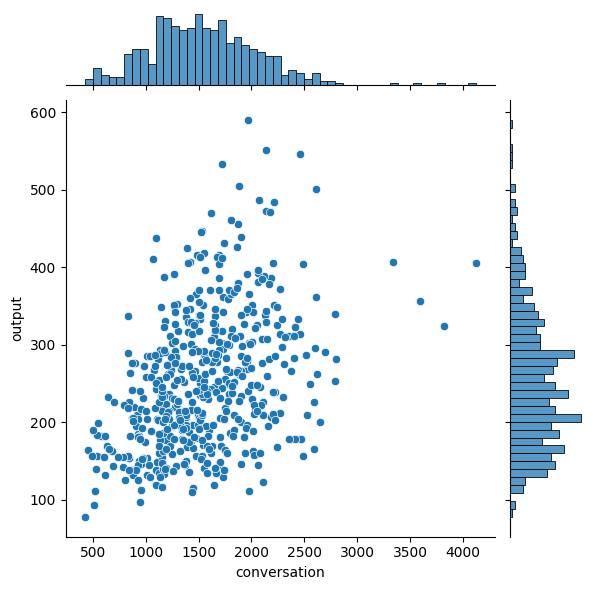

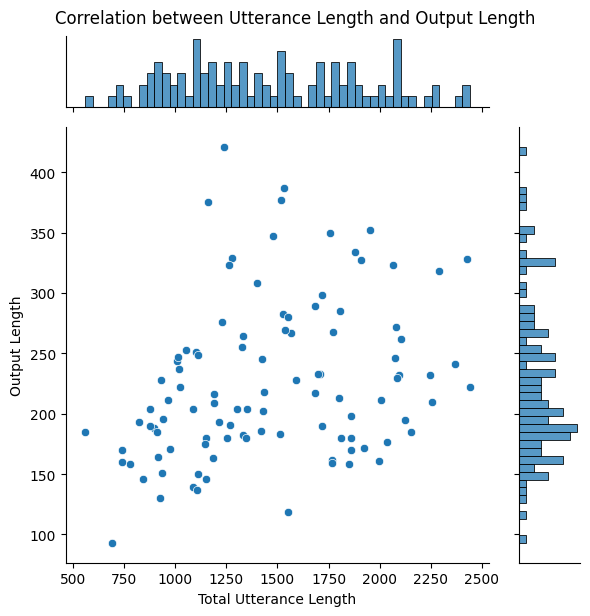

In [39]:
correlation_between_utterance_length_and_output_length(train_df, tokenizer_1, additional_df=dev_df)

## output 내의 개행문자, 특수 문자 존재 여부 확인

In [49]:
def special_character_statistics(df: pd.DataFrame) -> None:
    """
    Print the statistics of the punctuation in the output.

    Parameters:
    df (pd.DataFrame): DataFrame of the data.
    """
    # Copy the DataFrame
    df = deepcopy(df)

    # Check the sp_token in the output
    sp_token = ['\n', '!', '?', '#', '@', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+', '=', '[', ']', '{', '}', '|', '\\', ';', ':', '"', "'", '<', '>', ',', '.', '/', ' ']
    for punc in sp_token:
        df['punctuation'] = df['output'].apply(lambda x: punc in x)
        punc = punc if punc != '\n' else '\\n'
        if df['punctuation'].sum():
            print(f'The number of samples that have the special token in the output "{punc}":', df['punctuation'].sum(), '/', len(df), end='\n'+'-'*95+'\n')

In [8]:
special_character_statistics(train_df)

The number of samples that have the special token in the output "-": 5 / 506
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output ",": 382 / 506
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output ".": 506 / 506
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output " ": 506 / 506
-----------------------------------------------------------------------------------------------


In [109]:
special_character_statistics(dev_df)

The number of samples that have the special token in the output "-": 2 / 102
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output ",": 75 / 102
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output ".": 102 / 102
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output " ": 102 / 102
-----------------------------------------------------------------------------------------------


In [110]:
special_character_statistics(result_df)

The number of samples that have the special token in the output "\n": 301 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "?": 1 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "#": 9 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "%": 2 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "&": 4 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "*": 58 / 408
------------------------------------------------------

In [11]:
special_character_statistics(result_df)

The number of samples that have the special token in the output "\n": 330 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "?": 6 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "%": 2 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "&": 4 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "(": 1 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output ")": 1 / 408
-------------------------------------------------------

In [11]:
special_character_statistics(nova_result)

The number of samples that have the special token in the output "\n": 42 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "%": 1 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "&": 1 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output "-": 1 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output ";": 1 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output ":": 2 / 408
--------------------------------------------------------

In [17]:
# after post-processing
result_df = make_dataframe('../result.json')

special_character_statistics(result_df)

The number of samples that have the special token in the output "-": 4 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output ",": 403 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output ".": 408 / 408
-----------------------------------------------------------------------------------------------
The number of samples that have the special token in the output " ": 408 / 408
-----------------------------------------------------------------------------------------------


- 결과, 필요없는 특수문제를 제거해 주는 것이, 점수 향상에 큰 도움을 줄 것으로 보임
    
    - 이걸 prompt를 통해 모델에 제안을 해줄 것일지, 아님 후처리를 통해 없엘 것인지를 선택해야함

    <br/>
    
    - prompt를 통해 제안을 한다면
        
        - 보다 깔끔한 문장 형태로 특수문자가 제거될 것임
        - 하지만, prompt의 특성상 완벽하게 제거되지 않을 가능성이 존재

    - 후처리를 통해 제거한다면

        - 완벽하게 제거하는 것이 가능
        - 하지만, 문장이 이상해질 가능성이 있음. 해당 특수문자가 해당 문장 내에서 특별한 역할을 수행하는 경우가 존재하기 떄문

---

## Output 구조에 맞게 모델이 내뱉도록 하기 위해 할 수 있는 것들

- **prompt를 구성한다**
    - 예를 들어, "요약을 하는데 맨 첫 문장은 전반적인 대화에 대한 요약, 이어서 'speaker 1은 ~~' 형태의 여러개의 문장, 마지막으로 'speaker 2는 ~' 형태의 여러개의 문장으로 작성해줘'

</br>

- **대화 내역의 노이즈를 없앤 후 모델에 전달한다**
    - 대화 내역과 output 간의 상관관계를 파악하여 필요한 feature들과 불필요한 feautre들을 파악하고
    - 필요한 feature들만 남겨 모델의 입력으로 사용한다

</br>

- **최대 길이에 의해 짤리는 부분을 완전히 없앤다**
    - 모델이 맨 마지막 지시(instruction)에 해당하는 부분의 토큰까지 모두 입력으로 받아낼 수 있도록 
    - 최대 길이를 조절하던지, 앞선 방식으로 입력을 줄여서 사용한다

</br>

- **lost in the middle 문제가 발생하는지 파악하고 이를 해결한다**
    - 대화 내역이 워낙 길다 보니까, 중간에 해당하는 부분이 제대로 요약되고 있는지를 validation dataset에 대해 평가한다
    - 만약 제대로 요약되지 않고 있다면, 이를 해결하기 위해 
        - 앞서 분석한 요약에 별로 쓸모가 없는 문장들을 중간에 배치하고
        - 중요한 문장을 앞 뒤에 배치함으로써 해결한다

<br/>